# Model Ensemble
In this task, we are going to implement a model ensemble using stacking. It stacks well-trained models from previous tasks through a voting mechanism. 

## 1. Collect and Explore the Data
Take a look at these data first.

In [3]:
import pandas as pd

data_train = pd.read_csv("data/data_train.csv")
data_test = pd.read_csv("data/data_test.csv")
print(data_train.shape)
print(data_test.shape)

(32561, 15)
(16281, 15)


In [4]:
data_train.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
data_train.describe()

,age,fnlwgt,educational_num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
data_test.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [7]:
data_test.describe()

,age,fnlwgt,educational_num,capital-gain,capital-loss,hours-per-week,income
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.236226
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.424776
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [8]:
print(data_train.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object


In [9]:
print(data_test.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object


## 2. Preprocessing
As everyone might have different preprocess actions towards the training dataset, it is necessary to perform corresponding preprocess actions to the testing set and then it can be used to test different models. 

### 2.1 Decision Tree

#### 2.1.1 Prepare train and validation data for the decision trees

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load test data
data_train = pd.read_csv('data/data_train.csv')

feature_names = ['age', 'workclass', 'fnlwgt', 'educational_num', 'marital-status', 'occupation', 'relationship',
                 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

encoder = LabelEncoder()
data_train['workclass'] = encoder.fit_transform(data_train['workclass'])
data_train['marital-status'] = encoder.fit_transform(
    data_train['marital-status'])
data_train['occupation'] = encoder.fit_transform(data_train['occupation'])
data_train['relationship'] = encoder.fit_transform(data_train['relationship'])
data_train['race'] = encoder.fit_transform(data_train['race'])
data_train['gender'] = encoder.fit_transform(data_train['gender'])
data_train['native-country'] = encoder.fit_transform(
    data_train['native-country'])

# Preprocessed test set for decision tree
x_train = data_train[feature_names]
y_train = data_train['income']

# Spliting the training set and validation set by 20%
x_train_tree, x_val_tree, y_train_tree, y_val_tree = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# print(x_train_tree.shape)
# print(x_val_tree.shape)

#### 2.1.2 Prepare test data for the decision trees

In [11]:
# Load test data
data_test = pd.read_csv('data/data_test.csv')

feature_names = ['age', 'workclass', 'fnlwgt', 'educational_num', 'marital-status', 'occupation', 'relationship',
                 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

encoder = LabelEncoder()
data_test['workclass'] = encoder.fit_transform(data_test['workclass'])
data_test['marital-status'] = encoder.fit_transform(
    data_test['marital-status'])
data_test['occupation'] = encoder.fit_transform(data_test['occupation'])
data_test['relationship'] = encoder.fit_transform(data_test['relationship'])
data_test['race'] = encoder.fit_transform(data_test['race'])
data_test['gender'] = encoder.fit_transform(data_test['gender'])
data_test['native-country'] = encoder.fit_transform(
    data_test['native-country'])

# Preprocessed test set for decision tree
x_test_tree = data_test[feature_names]
y_test_tree = data_test['income']

# Preprocessed test set
# print(x_test_tree)
# print(y_test_tree)

### 2.2 K-NN

#### 2.2.1 Prepare train and validation data for the k-NN
Load the data and encode categorical features.

In [12]:
# Load test data
data_train = pd.read_csv('data/data_train.csv')

# transformation 
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
test_knn = []
for col in cat_columns:
    data_train[col] = le.fit_transform(data_train[col])

# Split the test set
x_train = data_train.drop(columns =['income'])
y_train = data_train['income']

# Spliting the training set and validation set by 20%
x_train_knn, x_val_knn, y_train_knn, y_val_knn = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# print(x_train_knn.shape)
# print(x_val_knn.shape)

#Standard Scaling
from sklearn import preprocessing

x_train_knn = preprocessing.StandardScaler().fit(x_train_knn).transform(x_train_knn.astype(float))
print(x_train_knn)

[[-0.40875606 -1.88422155  0.08005085 ... -0.21799808  0.77946024
   0.26333357]
 [-0.1888573  -0.0841701  -0.98165286 ...  4.45716784  0.77946024
   0.26333357]
 [ 1.42373357  1.71588136  0.126197   ... -0.21799808 -0.03151042
   0.26333357]
 ...
 [-1.50824984 -0.0841701   0.25206312 ... -0.21799808 -1.65345173
   0.26333357]
 [ 0.83733689  1.71588136 -1.28762772 ... -0.21799808  3.53676046
   0.26333357]
 [-0.33545648  0.81585563 -0.59020877 ... -0.21799808  1.59043089
   0.26333357]]


#### 2.2.2 Prepare test data for the k-NN


In [13]:
# Load test data
data_test = pd.read_csv('data/data_test.csv')

# transformation 
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
test_knn = []
for col in cat_columns:
    data_test[col] = le.fit_transform(data_test[col])

# Split the test set
x_test_knn = data_test.drop(columns =['income'])
y_test_knn = data_test['income']

# Print the first 5 rows of the transformed dataset
# print(x_test_knn.head())
# print(y_test_knn.head())

#Standard Scaling
from sklearn import preprocessing

x_test_knn = preprocessing.StandardScaler().fit(x_test_knn).transform(x_test_knn.astype(float))
# print(x_test_knn)

### 2.3 Neural Network

#### 2.3.1 Prepare train and validation data for the neural network


In [14]:
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# Load test data
data_train = pd.read_csv('data/data_train.csv', header=0)

# feature transformation
for col in data_train:
    if data_train[col].dtype == 'object':
        data_train[col] = encoder.fit_transform(data_train[col].astype(str))

# feature scaling
scaler = MinMaxScaler()
for col in data_train.columns:
    data_train[col] = scaler.fit_transform(data_train[[col]])

x_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
# print(x_test_nn)
# print(y_test_nn)

# Spliting the training set and validation set by 20%
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train_nn.shape)
print(x_val_nn.shape)


(26048, 14)
(6513, 14)


#### 2.3.2 Prepare test data for the neural network


In [15]:
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# Load test data
data_test = pd.read_csv('data/data_test.csv', header=0)

# feature transformation
for col in data_test:
    if data_test[col].dtype == 'object':
        data_test[col] = encoder.fit_transform(data_test[col].astype(str))

# feature scaling
scaler = MinMaxScaler()
for col in data_test.columns:
    data_test[col] = scaler.fit_transform(data_test[[col]])

x_test_nn = data_test.iloc[:, :-1]
y_test_nn = data_test.iloc[:, -1]
# print(x_test_nn)
# print(y_test_nn)

### 2.4 Bayesian Leanring

#### 2.4.1 Prepare train data and validation for the Bayesian learning


In [16]:
#Importing the tain data
import pandas as pd
data_test = pd.read_csv('data/data_train.csv')
data_test = data_test.reset_index()
xs_test = data_test.drop(['income'], axis=1)
ys_test = data_test['income']

In [17]:
#Store all the categorical features
categorical = [var for var in xs_test.columns if xs_test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Store all the numerical features
numerical = [var for var in xs_test.columns if xs_test[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
There are 7 numerical variables

The numerical variables are :

 ['index', 'age', 'fnlwgt', 'educational_num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [18]:
##Discretization the numerical features##
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#Age
age_t = xs_test['age']
age_t=age_t.values.reshape(-1,1)
age_trans_t = kbins.fit_transform(age_t)

#Final weight
fw_t = xs_test['fnlwgt']
fw_t=fw_t.values.reshape(-1,1)
fw_trans_t = kbins.fit_transform(fw_t)

#educational_num
edunum_t = xs_test['educational_num']
edunum_t=edunum_t.values.reshape(-1,1)
edunum_trans_t = kbins.fit_transform(edunum_t)

#capital gain
cg_t = xs_test['capital-gain']
cg_t=cg_t.values.reshape(-1,1)
cg_trans_t = kbins.fit_transform(cg_t)

#capital loss
cl_t = xs_test['capital-loss']
cl_t=cl_t.values.reshape(-1,1)
cl_trans_t = kbins.fit_transform(cl_t)

#hours-per-week
hours_t = xs_test['hours-per-week']
hours_t=hours_t.values.reshape(-1,1)
hours_trans_t = kbins.fit_transform(hours_t)

In [19]:
age_t=pd.DataFrame(age_trans_t,columns =['age'])
fw_t=pd.DataFrame(fw_trans_t,columns =['fnlwgt'])
edunum_t=pd.DataFrame(edunum_trans_t,columns =['educational-num'])
cg_t=pd.DataFrame(cg_trans_t,columns =['capital-gain'])
cl_t=pd.DataFrame(cl_trans_t,columns =['capital-loss'])
hours_t=pd.DataFrame(hours_trans_t,columns =['hours-per-week'])


numerical_trans_t = pd.concat([age_t,fw_t,edunum_t,cg_t,cl_t,hours_t],axis=1)

xs_bnb_test = pd.concat([xs_test[categorical],numerical_trans_t],axis=1)

In [20]:
#install encoder library
# !pip install category_encoders
import category_encoders as ce

#import the trained encoder_bnb
import pickle
with open("output/Bayes_Learning/encoder_bnb.pkl", "rb") as f:
    encoder_bnb = pickle.load(f)

#Encode the unseen test data
# xs_bnb_test = encoder_bnb.transform(xs_bnb_test)
# ys_bnb_test = ys_test

x_train = encoder_bnb.transform(xs_bnb_test)
y_train = ys_test

# Spliting the training set and validation set by 20%
x_train_nb, x_val_nb, y_train_nb, y_val_nb = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train_nb.shape)
print(x_val_nb.shape)



(26048, 154)
(6513, 154)


#### 2.4.2 Prepare test for the Bayesian learning


In [21]:
#Importing the testing data
import pandas as pd
data_test = pd.read_csv('data/data_test.csv')
data_test = data_test.reset_index()
xs_test = data_test.drop(['income'], axis=1)
ys_test = data_test['income']

#Store all the categorical features
categorical = [var for var in xs_test.columns if xs_test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Store all the numerical features
numerical = [var for var in xs_test.columns if xs_test[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

# Discretization the numerical features##
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#Age
age_t = xs_test['age']
age_t=age_t.values.reshape(-1,1)
age_trans_t = kbins.fit_transform(age_t)

#Final weight
fw_t = xs_test['fnlwgt']
fw_t=fw_t.values.reshape(-1,1)
fw_trans_t = kbins.fit_transform(fw_t)

#educational_num
edunum_t = xs_test['educational_num']
edunum_t=edunum_t.values.reshape(-1,1)
edunum_trans_t = kbins.fit_transform(edunum_t)

#capital gain
cg_t = xs_test['capital-gain']
cg_t=cg_t.values.reshape(-1,1)
cg_trans_t = kbins.fit_transform(cg_t)

#capital loss
cl_t = xs_test['capital-loss']
cl_t=cl_t.values.reshape(-1,1)
cl_trans_t = kbins.fit_transform(cl_t)

#hours-per-week
hours_t = xs_test['hours-per-week']
hours_t=hours_t.values.reshape(-1,1)
hours_trans_t = kbins.fit_transform(hours_t)

age_t=pd.DataFrame(age_trans_t,columns =['age'])
fw_t=pd.DataFrame(fw_trans_t,columns =['fnlwgt'])
edunum_t=pd.DataFrame(edunum_trans_t,columns =['educational-num'])
cg_t=pd.DataFrame(cg_trans_t,columns =['capital-gain'])
cl_t=pd.DataFrame(cl_trans_t,columns =['capital-loss'])
hours_t=pd.DataFrame(hours_trans_t,columns =['hours-per-week'])


numerical_trans_t = pd.concat([age_t,fw_t,edunum_t,cg_t,cl_t,hours_t],axis=1)

xs_bnb_test = pd.concat([xs_test[categorical],numerical_trans_t],axis=1)


There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
There are 7 numerical variables

The numerical variables are :

 ['index', 'age', 'fnlwgt', 'educational_num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [22]:
import category_encoders as ce

# import the trained encoder_bnb
import pickle
with open("output/Bayes_Learning/encoder_bnb.pkl", "rb") as f:
    encoder_bnb = pickle.load(f)

#Encode the unseen test data
# xs_bnb_test = encoder_bnb.transform(xs_bnb_test)
# ys_bnb_test = ys_test

x_test_nb = encoder_bnb.transform(xs_bnb_test)
y_test_nb = ys_test

## 3. Predict the Result
Since the features of training data used by our base models are different, in other words, they have different preprocessing procedures, the features of the testing data used to test base models are also different. That means a simple VotingClassifier can not be used. 

To address this problem, we implemented the necessary functionalities manually. The first step is to predict the results of all models for later usage (voting). Then we built a custom voting model class called EnsembleModel. Not like VotingClassifier takes classifiers as input when initializing, it takes predictions we made in this section as input. Turn to section 4 to see more details.

### 3.1 Result of decision tree

In [23]:
# Load the decision tree
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load model
with open('output/dt/pruned_decision_tree.pkl', 'rb') as f:
    decision_tree = pickle.load(f)

print(decision_tree)

# Make predictions on the training data
y_pred_tree_proba = decision_tree.predict_proba(x_train_tree)[:, 1]  # probability of ">50k"
# print(y_pred_tree_proba)
# print(y_pred_tree_proba.shape)
y_pred_tree = decision_tree.predict(x_train_tree)  # binary
print(y_pred_tree)
print(y_pred_tree.shape)


# Make predictions on the validation data
y_pred_val_tree_proba = decision_tree.predict_proba(x_val_tree)[:, 1]  # probability of ">50k"
# print(y_pred_val_tree_proba)
# print(y_pred_val_tree_proba.shape)
y_pred_val_tree = decision_tree.predict(x_val_tree)  # binary
print(y_pred_val_tree)
print(y_pred_val_tree.shape)


# Make predictions on the testing data
y_pred_test_tree_proba = decision_tree.predict_proba(x_test_tree)[:, 1]  # probability of ">50k"
# print(y_pred_test_tree_proba)
# print(y_pred_test_tree_proba.shape)
y_pred_test_tree = decision_tree.predict(x_test_tree)  # binary
print(y_pred_test_tree)
print(y_pred_test_tree.shape)


# Evaluate the model 
# print(classification_report(y_test_tree,y_pred_test_tree_proba > 0.5))
# auc = roc_auc_score(y_test_tree, y_pred_test_tree_proba > 0.5)  # ROC score
# print('ROC_AUC score: {:.4f}'.format(auc))


DecisionTreeClassifier(max_depth=9, max_features=8, min_samples_leaf=10,
                       min_samples_split=8)
[0 0 0 ... 0 0 0]
(26048,)
[0 0 1 ... 1 0 0]
(6513,)
[0 0 0 ... 1 0 1]
(16281,)


/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 3.2 Result of k-NN

In [24]:
import joblib
import time

# Load k-NN model
knn_model = joblib.load('output/knn/kNN.pkl')
# joblib.dump(knn_model, 'output/knn/kNN.pkl')
print(knn_model)

# Make predictions on the training data
y_pred_knn_proba = knn_model.predict_proba(x_train_knn)[:, 1]  # probability of ">50k"
# print(y_pred_knn_proba)
# print(y_pred_knn_proba.shape)
y_pred_knn = knn_model.predict(x_train_knn)  # binary result
print(y_pred_knn)
print(y_pred_knn.shape)


# Make predictions on the validation data
y_pred_val_knn_proba = knn_model.predict_proba(x_val_knn)[:, 1]  # probability of ">50k"
y_pred_val_knn = knn_model.predict(x_val_knn)  # binary result
print(y_pred_val_knn)
print(y_pred_val_knn.shape)


# Make predictions on the testing data
y_pred_test_knn_proba = knn_model.predict_proba(x_test_knn)[:, 1]  # probability of ">50k"
y_pred_test_knn = knn_model.predict(x_test_knn)  # binary result
print(y_pred_test_knn)
print(y_pred_test_knn.shape)

# Evaluate the the model
# print(classification_report(y_train_knn,y_pred_knn))
# auc = roc_auc_score(y_train_knn,y_pred_knn)  # ROC score
# print('ROC_AUC score: {:.4f}'.format(auc))

KNeighborsClassifier(leaf_size=16, metric='manhattan', n_neighbors=29)
[0 1 0 ... 0 0 0]
(26048,)


/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 ... 1 0 0]
(6513,)
[0 0 1 ... 1 0 1]
(16281,)


### 3.3 Result of neural networks

In [25]:
from tensorflow import keras
import numpy as np


# Load neutral network model
nn_model = keras.models.load_model('output/NeuralNetwork/NeuralNetwork.h5')
nn_model.summary()
# print(x_train_nn)
# print(x_train_nn.shape)

# Make predictions on the training data
y_pred_nn_proba = nn_model.predict(x_train_nn)  # probability of ">50k"
y_pred_nn_proba = np.squeeze(y_pred_nn_proba)  # to 1-d array
# print(y_pred_nn_prob)
# print(y_pred_nn_prob.shape)
y_pred_nn = np.where(y_pred_nn_proba > 0.5, 1, 0)  # probability to binary results
print(y_pred_nn)
print(y_pred_nn.shape)


# Make predictions on the validation data
y_pred_val_nn_proba = nn_model.predict(x_val_nn)  # probability of ">50k"
y_pred_val_nn_proba = np.squeeze(y_pred_val_nn_proba)  # to 1-d array
# print(y_pred_val_nn_proba)
# print(y_pred_val_nn_proba.shape)
y_pred_val_nn = np.where(y_pred_val_nn_proba > 0.5, 1, 0)  # probability to binary results
print(y_pred_val_nn)
print(y_pred_val_nn.shape)


# Make predictions on the testing data
y_pred_test_nn_proba = nn_model.predict(x_test_nn)  # probability of ">50k"
y_pred_test_nn_proba = np.squeeze(y_pred_test_nn_proba)  # to 1-d array
# print(y_pred_test_nn_proba)
# print(y_pred_test_nn_proba.shape)
y_pred_test_nn = np.where(y_pred_test_nn_proba > 0.5, 1, 0)  # probability to binary results
print(y_pred_test_nn)
print(y_pred_test_nn.shape)


# Evaluate the model
# print(classification_report(y_train_nn,y_pred_nn))
# auc = roc_auc_score(y_train_nn, y_pred_nn)  # ROC score
# print('ROC_AUC score: {:.4f}'.format(auc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 224)               3360      
                                                                 
 batch_normalization_12 (Bat  (None, 224)              896       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 224)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               28800     
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 128)              

2023-03-27 02:12:45.568192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


814/814 [==============================] - 1s 650us/step
[0 1 0 ... 0 0 0]
(26048,)
204/204 [==============================] - 0s 769us/step
[0 0 1 ... 1 0 0]
(6513,)
509/509 [==============================] - 0s 732us/step
[0 0 0 ... 1 1 1]
(16281,)


### 3.4 Result of Bayesian learning

In [26]:
# Load NB model
nb_model = pickle.load(open('output/Bayes_Learning/BernoullilNaiveBayes.sav', 'rb'))

# Make predictions on the training data
y_pred_nb_proba = nb_model.predict_proba(x_train_nb)[:, 1]  # probability of ">50k"
# print(y_pred_nb_proba)
# print(y_pred_nb_proba.shape)
y_pred_nb = nb_model.predict(x_train_nb)
print(y_pred_nb)
print(y_pred_nb.shape)

# Make predictions on the validation data
y_pred_val_nb_proba = nb_model.predict_proba(x_val_nb)[:, 1]  # probability of ">50k"
# print(y_pred_val_nb_proba)
# print(y_pred_val_nb_proba.shape)
y_pred_val_nb = nb_model.predict(x_val_nb)
print(y_pred_val_nb)
print(y_pred_val_nb.shape)

# Make predictions on the testing data
y_pred_test_nb_proba = nb_model.predict_proba(x_test_nb)[:, 1]  # probability of ">50k"
# print(y_pred_test_nb_proba)
# print(y_pred_test_nb_proba.shape)
y_pred_test_nb = nb_model.predict(x_test_nb)
print(y_pred_test_nb)
print(y_pred_test_nb.shape)


# Evaluate the model
# print(classification_report(y_test_nb,y_pred_test_nb))
# auc = roc_auc_score(y_test_nb, y_pred_test_nb)  # ROC score
# print('ROC_AUC score: {:.4f}'.format(auc))

[0 1 0 ... 0 0 0]
(26048,)
[0 0 1 ... 1 0 0]
(6513,)
[0 0 1 ... 1 0 1]
(16281,)


/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator BernoulliNB from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## 4. Majority Voting

In this section, we built a custom ensemble model using majority voting machanism, including hard voting and soft voting. We then implemented a hard voting and a soft voting, and compared them. Finally, we evaluate both of their performance.

### 4.1 Custom Ensemble Model

In [27]:
from scipy.stats import mode

class EnsembleModel():

    def __init__(self, voting):
        self.voting = voting
        

    def predict(self, predictions, weights=[]):
        # Stack the predictions into a single array
        predictions_stack = np.stack(predictions)  # stack prediction of base classifiers; shape: (num_of_base_models, num_of_test_instances)
        
        # print(predictions.shape)
        if (self.voting == "soft"):
            # Soft Voting
            # Compute the weighted average of the predictions along the first axis (i.e., across each column)
            if (weights == []):
                # Default: weights are equal
                soft_pred_prob = np.average(predictions_stack, axis=0)
            else:
                # Use passing weights
                soft_pred_prob = np.average(predictions_stack, axis=0, weights=weights)

            soft_pred = np.where(soft_pred_prob > 0.5, 1, 0)  # probability to 0/1
            return soft_pred
        else:
            # Hard Voting
            # Compute the mode of the predictions along the first axis (i.e., across each column)
            mode_pred = mode(predictions_stack, axis=0).mode
            mode_pred = np.transpose(mode_pred) 
            mode_pred = np.squeeze(mode_pred)
            # print(mode_pred)
            # print(mode_pred.shape)
            return mode_pred

### 4.2 Hard Voting VS. Soft Voting

In [28]:
# prepare target values
y_train = y_train_tree
y_val = y_val_tree
y_test = y_test_tree
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(26048,)
(6513,)
(16281,)


#### 4.2.1 Hard voting

In [29]:
predictions_train = [y_pred_tree, y_pred_knn, y_pred_nn, y_pred_nb]  # binary predictions for training data
predictions_val = [y_pred_val_tree, y_pred_val_knn, y_pred_val_nn, y_pred_val_nb]  # binary predictions for validation data
predictions_test = [y_pred_test_tree, y_pred_test_knn, y_pred_test_nn, y_pred_test_nb]  # binary predictions for testing data

e_hard = EnsembleModel("hard")

# Make predictions on the training data
hard_pred = e_hard.predict(predictions_train)
# print(hard_pred)
# print(hard_pred.shape)


# Make predictions on the validation data
hard_pred_val = e_hard.predict(predictions_val)
# print(hard_pred_val)
# print(hard_pred_val.shape)


# Evaluate the model
# print(classification_report(y_test,hard_pred))
auc = roc_auc_score(y_train, hard_pred)  # ROC score
print('Training ROC_AUC score: {:.4f}'.format(auc))

auc = roc_auc_score(y_val, hard_pred_val)  # ROC score
print('Validation ROC_AUC score: {:.4f}'.format(auc))

/var/folders/m9/nxhg4vsx36x27z5gtvc6ylk00000gn/T/ipykernel_69326/2289312344.py:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_pred = mode(predictions_stack, axis=0).mode


Training ROC_AUC score: 0.7580
Validation ROC_AUC score: 0.7597


#### 4.2.2 Soft voting

In [30]:
predictions_train = [y_pred_tree_proba, y_pred_knn_proba, y_pred_nn_proba, y_pred_nb_proba]  # probability predictions for training data
predictions_val = [y_pred_val_tree_proba, y_pred_val_knn_proba, y_pred_val_nn_proba, y_pred_val_nb_proba]  # probability predictions for validation data
predictions_test = [y_pred_test_tree_proba, y_pred_test_knn_proba, y_pred_test_nn_proba, y_pred_test_nb_proba]  # probability predictions for validation data

# default weights = [1, 1, 1, 1]
e_soft = EnsembleModel("soft")

# Make predictions on the training data
soft_pred = e_soft.predict(predictions_train)

# Make predictions on the validation data
soft_pred_val = e_soft.predict(predictions_val)

# Evaluate the model
# print(classification_report(y_test,soft_pred))
auc = roc_auc_score(y_train, soft_pred)  # ROC score
print('Training ROC_AUC score: {:.4f}'.format(auc))
auc = roc_auc_score(y_val, hard_pred_val)  # ROC score
print('Validation ROC_AUC score: {:.4f}'.format(auc))

Training ROC_AUC score: 0.7843
Validation ROC_AUC score: 0.7597


The validation ROC_AUC score of them are the same (i.e., 0.7597), but the training ROC_AUC score (i.e., 0.7843) is higher on the soft voting model (i.e., 0.7580). So it is considered better than the hard voting model.

### 4.3 Evaluation
We wanted to know how them perform on unseen data, so we evaluated both models.

In [31]:
# Make predictions on the testing data
predictions_test = [y_pred_test_tree, y_pred_test_knn, y_pred_test_nn, y_pred_test_nb]  # binary predictions for testing data
hard_pred_test = e_hard.predict(predictions_test)

# Make predictions on the testing data
predictions_test = [y_pred_test_tree_proba, y_pred_test_knn_proba, y_pred_test_nn_proba, y_pred_test_nb_proba]  # probability predictions for validation data
soft_pred_test = e_soft.predict(predictions_test)

# Evaluate the model
print(classification_report(y_test, hard_pred_test))
auc = roc_auc_score(y_test, hard_pred_test)  # ROC score
print('Hard voting ROC_AUC score: {:.4f}'.format(auc))

print(classification_report(y_test,soft_pred_test))
auc = roc_auc_score(y_test, soft_pred_test)  # ROC score
print('Soft voting ROC_AUC score: {:.4f}'.format(auc))

/var/folders/m9/nxhg4vsx36x27z5gtvc6ylk00000gn/T/ipykernel_69326/2289312344.py:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_pred = mode(predictions_stack, axis=0).mode


              precision    recall  f1-score   support

           0       0.87      0.94      0.91     12435
           1       0.74      0.56      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281

Hard voting ROC_AUC score: 0.7509
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12435
           1       0.71      0.62      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.84      0.85      0.85     16281

Soft voting ROC_AUC score: 0.7720


Soft voting also perform better on the unseen data than hard voting, so we now focus on the soft voting model.

## 5. Hyper-parameter Tuning
This section displays how the tuning was done. Since we are using a soft voting model, we use the weights of the resulting probability of different base models as the parameters to be tuned.

### 5.1 Test domination of different models
By assigning high weights to one of the models and low weights to other models, we can see which one leads to better performance.

In [32]:
predictions_train = [y_pred_tree_proba, y_pred_knn_proba, y_pred_nn_proba, y_pred_nb_proba]  # probability predictions for training data
predictions_val = [y_pred_val_tree_proba, y_pred_val_knn_proba, y_pred_val_nn_proba, y_pred_val_nb_proba]  # probability predictions for validation data
predictions_test = [y_pred_test_tree_proba, y_pred_test_knn_proba, y_pred_test_nn_proba, y_pred_test_nb_proba]  # probability predictions for validation data

weights1 = [0.7, 0.1, 0.1, 0.1]  # decision tree dominate
weights2 = [0.1, 0.7, 0.1, 0.1]  # knn deminate
weights3 = [0.1, 0.1, 0.7, 0.1]  # neutral network dominate
weights4 = [0.1, 0.1, 0.1, 0.7]  # Bernoulli NB

e_soft = EnsembleModel("soft")

# Make predictions on the training data
soft_pred_1 = e_soft.predict(predictions_train, weights1)
soft_pred_2 = e_soft.predict(predictions_train, weights2)
soft_pred_3 = e_soft.predict(predictions_train, weights3)
soft_pred_4 = e_soft.predict(predictions_train, weights4)

# Make predictions on the validation data
soft_pred_val_1 = e_soft.predict(predictions_val, weights1)
soft_pred_val_2 = e_soft.predict(predictions_val, weights2)
soft_pred_val_3 = e_soft.predict(predictions_val, weights3)
soft_pred_val_4 = e_soft.predict(predictions_val, weights4)


# Evaluate the model
# print(classification_report(y_test,soft_pred))
print('Training ROC_AUC score 1 (dt): {:.4f}'.format(roc_auc_score(y_train, soft_pred_1)))
print('Training ROC_AUC score 2 (knn): {:.4f}'.format(roc_auc_score(y_train, soft_pred_2)))
print('Training ROC_AUC score 3 (nn): {:.4f}'.format(roc_auc_score(y_train, soft_pred_3)))
print('Training ROC_AUC score 4 (bnb): {:.4f}'.format(roc_auc_score(y_train, soft_pred_4)))

print('Validation ROC_AUC score 1 (dt): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_1)))
print('Validation ROC_AUC score 2 (knn): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_2)))
print('Validation ROC_AUC score 3 (nn): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_3)))
print('Validation ROC_AUC score 4 (bnb): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_4)))

Training ROC_AUC score 1 (dt): 0.7811
Training ROC_AUC score 2 (knn): 0.7741
Training ROC_AUC score 3 (nn): 0.7790
Training ROC_AUC score 4 (bnb): 0.7695
Validation ROC_AUC score 1 (dt): 0.7889
Validation ROC_AUC score 2 (knn): 0.6302
Validation ROC_AUC score 3 (nn): 0.7822
Validation ROC_AUC score 4 (bnb): 0.7736


The decision tree dominate model gave the best result both on the training set and validation set, so it is considered to be the best model.

The knn performs worst on the validation set.

### 5.2 Attempt improving the preformance
Now that we know when the decision tree is dominate, the performance is better. Next, we want to try lifting and decrising its weight, and see if we can further improve.

#### 5.2.1 Increasing weights of decision tree


In [33]:
# predictions_train = [y_pred_tree_proba, y_pred_knn_proba, y_pred_nn_proba, y_pred_nb_proba]  # probability predictions for training data
# predictions_val = [y_pred_val_tree_proba, y_pred_val_knn_proba, y_pred_val_nn_proba, y_pred_val_nb_proba]  # probability predictions for validation data

weights1 = [0.7, 0.1, 0.1, 0.1]  # decision tree dominate
weights2 = [0.8, 0.067, 0.067, 0.066]  # decision tree dominate
weights3 = [0.9, 0.034, 0.034, 0.034]  # decision tree dominate
weights4 = [1, 0, 0, 0]  # decision tree dominate

e_soft = EnsembleModel("soft")

# Make predictions on the training data
soft_pred_1 = e_soft.predict(predictions_train, weights1)
soft_pred_2 = e_soft.predict(predictions_train, weights2)
soft_pred_3 = e_soft.predict(predictions_train, weights3)
soft_pred_4 = e_soft.predict(predictions_train, weights4)

# Make predictions on the validation data
soft_pred_val_1 = e_soft.predict(predictions_val, weights1)
soft_pred_val_2 = e_soft.predict(predictions_val, weights2)
soft_pred_val_3 = e_soft.predict(predictions_val, weights3)
soft_pred_val_4 = e_soft.predict(predictions_val, weights4)


# Evaluate the model
# print(classification_report(y_test,soft_pred))
print('Training ROC_AUC score 1 (0.7): {:.4f}'.format(roc_auc_score(y_train, soft_pred_1)))
print('Training ROC_AUC score 2 (0.8): {:.4f}'.format(roc_auc_score(y_train, soft_pred_2)))
print('Training ROC_AUC score 3 (0.9): {:.4f}'.format(roc_auc_score(y_train, soft_pred_3)))
print('Training ROC_AUC score 4 (1.0): {:.4f}'.format(roc_auc_score(y_train, soft_pred_4)))

print('Validation ROC_AUC score 1 (0.7): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_1)))
print('Validation ROC_AUC score 2 (0.8): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_2)))
print('Validation ROC_AUC score 3 (0.9): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_3)))
print('Validation ROC_AUC score 4 (1.0): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_4)))

Training ROC_AUC score 1 (0.7): 0.7811
Training ROC_AUC score 2 (0.8): 0.7822
Training ROC_AUC score 3 (0.9): 0.7844
Training ROC_AUC score 4 (1.0): 0.7852
Validation ROC_AUC score 1 (0.7): 0.7889
Validation ROC_AUC score 2 (0.8): 0.7897
Validation ROC_AUC score 3 (0.9): 0.7928
Validation ROC_AUC score 4 (1.0): 0.7921


We foudout that increasing the weights of the decision tree model help to improve the preformance. Comparing validation scores, we choose the third weights, [0.9, 0.034, 0.034, 0.034], as a candidate.

#### 5.2.2 Decreasing weights of decision tree


In [34]:
# predictions_train = [y_pred_tree_proba, y_pred_knn_proba, y_pred_nn_proba, y_pred_nb_proba]  # probability predictions for training data
# predictions_val = [y_pred_val_tree_proba, y_pred_val_knn_proba, y_pred_val_nn_proba, y_pred_val_nb_proba]  # probability predictions for validation data

weights1 = [0.7, 0.1, 0.1, 0.1]  # decision tree dominate
weights2 = [0.6, 0.013, 0.013, 0.013]  # decision tree dominate
weights3 = [0.5, 0.017, 0.017, 0.017]  # decision tree dominate
weights4 = [0.4, 0.2, 0.2, 0.2 ]  # decision tree dominate

e_soft = EnsembleModel("soft")

# Make predictions on the training data
soft_pred_1 = e_soft.predict(predictions_train, weights1)
soft_pred_2 = e_soft.predict(predictions_train, weights2)
soft_pred_3 = e_soft.predict(predictions_train, weights3)
soft_pred_4 = e_soft.predict(predictions_train, weights4)

# Make predictions on the validation data
soft_pred_val_1 = e_soft.predict(predictions_val, weights1)
soft_pred_val_2 = e_soft.predict(predictions_val, weights2)
soft_pred_val_3 = e_soft.predict(predictions_val, weights3)
soft_pred_val_4 = e_soft.predict(predictions_val, weights4)


# Evaluate the model
# print(classification_report(y_test,soft_pred))
print('Training ROC_AUC score 1 (0.7): {:.4f}'.format(roc_auc_score(y_train, soft_pred_1)))
print('Training ROC_AUC score 2 (0.6): {:.4f}'.format(roc_auc_score(y_train, soft_pred_2)))
print('Training ROC_AUC score 3 (0.5): {:.4f}'.format(roc_auc_score(y_train, soft_pred_3)))
print('Training ROC_AUC score 4 (0.4): {:.4f}'.format(roc_auc_score(y_train, soft_pred_4)))

print('Validation ROC_AUC score 1 (0.7): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_1)))
print('Validation ROC_AUC score 2 (0.6): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_2)))
print('Validation ROC_AUC score 3 (0.5): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_3)))
print('Validation ROC_AUC score 4 (0.4): {:.4f}'.format(roc_auc_score(y_val, soft_pred_val_4)))

Training ROC_AUC score 1 (0.7): 0.7811
Training ROC_AUC score 2 (0.6): 0.7855
Training ROC_AUC score 3 (0.5): 0.7849
Training ROC_AUC score 4 (0.4): 0.7834
Validation ROC_AUC score 1 (0.7): 0.7889
Validation ROC_AUC score 2 (0.6): 0.7930
Validation ROC_AUC score 3 (0.5): 0.7931
Validation ROC_AUC score 4 (0.4): 0.7860


The best validation score is given by the third weight. However, we notice the second weights perform well on both the training set and the validation set. So the second weights, [0.6, 0.013, 0.013, 0.013], is considered the best weights. 

Compared the validation score with the model with weights (i.e., [0.9, 0.034, 0.034, 0.034]) from the previous section (0.7928), the model with decreased weights is better (0.7930). So, weights = [0.6, 0.013, 0.013, 0.013] would be the best parameter.

## 6. Evaluation

Now, the best model has been chosen. It is a soft voting classifier with weights [0.6, 0.013, 0.013, 0.013]. We noe evaluate its performance on the test set.

509/509 [==============================] - 0s 750us/step
Time of prediction: 12.1191 s
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12435
           1       0.71      0.63      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.78      0.79     16281
weighted avg       0.85      0.85      0.85     16281

Soft voting ROC_AUC score: 0.7768


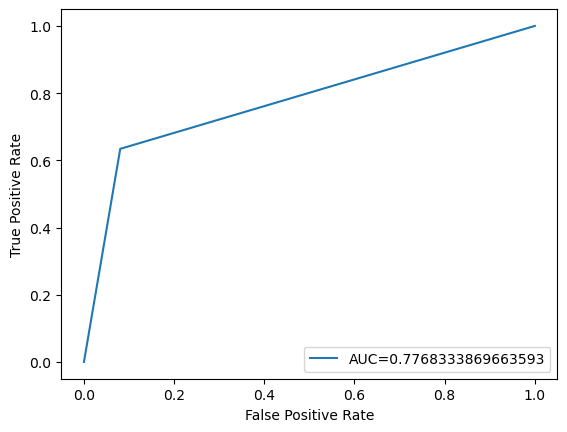

Confusion Matrix: 
 [[11434  1001]
 [ 1407  2439]]


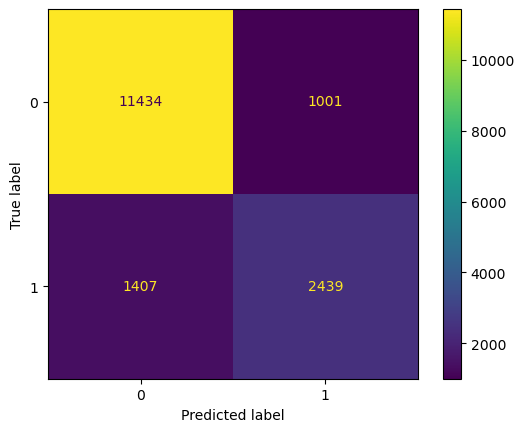

In [35]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Mark the start time
time_start = time.time()  

# Make predictions using dt
y_pred_test_tree_proba = decision_tree.predict_proba(x_test_tree)[:, 1]  # probability of ">50k"
# Make predictions using knn
y_pred_test_knn_proba = knn_model.predict_proba(x_test_knn)[:, 1]  # probability of ">50k"
# Make predictions using nn
y_pred_test_nn_proba = nn_model.predict(x_test_nn)  # probability of ">50k"
y_pred_test_nn_proba = np.squeeze(y_pred_test_nn_proba)  # to 1-d array
# Make predictions using nb
y_pred_test_nb_proba = nb_model.predict_proba(x_test_nb)[:, 1]  # probability of ">50k"

predictions_test = [y_pred_test_tree_proba, y_pred_test_knn_proba, y_pred_test_nn_proba, y_pred_test_nb_proba]  # probability predictions for validation data

best_weights = [0.6, 0.013, 0.013, 0.013]  # decision tree dominate

model_ensemble = EnsembleModel("soft")  # soft voting model

# Make predictions on the testing data
soft_pred = model_ensemble.predict(predictions_test, best_weights)

# Mark the end time
time_end = time.time()  # mark the end time
total_execution_time = time_end - time_start
print('Time of prediction: {:.4f} s'.format(total_execution_time))


# Evaluate the model
print(classification_report(y_test,soft_pred))
auc = roc_auc_score(y_test, soft_pred)  # ROC score
print('Soft voting ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, soft_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,soft_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()